In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../")

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.graphics as sg


import matplotlib.pylab as plt

import seaborn as sns
sns.set_theme()

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
df = pd.read_csv('../data/ts.csv', index_col=0, parse_dates=True)
df.shape

(43, 11)

In [29]:
df.head()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zakupy,bezrobocie,spr_detaliczna,pkb
2014-03-31,6193.211456,100.6,100.2,0.0446,41942.0,104.2,-20.5,-16.3,13.5,105.5,103.8
2014-06-30,6227.984614,100.3,100.0,0.0447,45499.0,104.1,-16.8,-15.0,12.0,105.1,103.9
2014-09-30,6357.260998,99.7,99.5,0.0443,43653.0,103.3,-16.9,-12.7,11.5,102.6,104.2
2014-12-31,6438.874574,99.3,99.6,0.0388,42993.0,103.3,-13.8,-10.7,11.4,103.7,103.9
2015-03-31,6473.616559,98.5,99.5,0.0348,42169.0,104.0,-14.9,-11.5,11.5,104.4,104.3


In [30]:
df.isna().sum(axis=0)

rynek               0
inflacja_r          0
inflacja_q          0
stopa_procentowa    0
liczba_kredytow     0
tempo_wzrostu       0
ufnosc              0
duze_zakupy         0
bezrobocie          0
spr_detaliczna      0
pkb                 0
dtype: int64

In [31]:
df.columns

Index(['rynek', 'inflacja_r', 'inflacja_q', 'stopa_procentowa',
       'liczba_kredytow', 'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
       'bezrobocie', 'spr_detaliczna', 'pkb'],
      dtype='object')

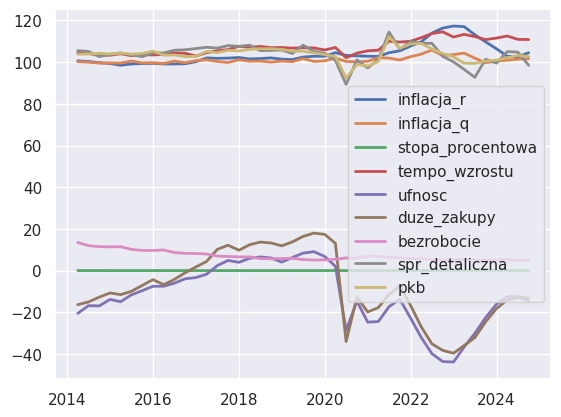

In [33]:
for col in ['inflacja_r', 'inflacja_q', 'stopa_procentowa',
        'tempo_wzrostu', 'ufnosc', 'duze_zakupy',
       'bezrobocie', 'spr_detaliczna', 'pkb']:
    plt.plot(df[col], lw=2, label=col)
plt.legend()

In [ ]:
for col in df.columns:
    fig = plt.figure(figsize=(6, 3))
    plt.title(col)
    plt.plot(df[col], lw=2, label=col)
    
    fig.savefig(f"../images/plot_column_{col}.png")
# plt.legend()

In [ ]:
df.describe()

,rynek,inflacja_r,inflacja_q,stopa_procentowa,liczba_kredytow,tempo_wzrostu,ufnosc,duze_zajupy,bezrobocie,spr_detaliczna,pkb
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,8969.261476,103.825581,100.983721,0.048044,48104.139535,107.218605,-12.034884,-7.934884,7.095349,103.939535,103.711628
std,2597.466115,5.054941,1.430606,0.021919,11237.663947,3.499949,14.807766,16.879163,2.321222,4.513954,3.245158
min,6193.211456,98.500000,99.300000,0.024200,18932.000000,102.100000,-43.800000,-39.600000,4.900000,89.300000,92.300000
25%,6800.584386,100.450000,100.050000,0.036000,43323.000000,104.200000,-21.500000,-17.200000,5.300000,102.000000,102.650000
50%,8010.311232,102.400000,100.500000,0.038200,47767.000000,106.800000,-12.500000,-10.700000,6.100000,104.800000,103.900000
75%,11087.526498,104.500000,101.650000,0.057400,54456.000000,110.400000,2.250000,10.000000,8.250000,106.300000,105.300000
max,14988.365863,117.300000,105.800000,0.092000,68860.000000,114.500000,9.100000,18.000000,13.500000,114.400000,112.200000


In [ ]:
for col in df.columns:

    decomposition = sm.tsa.seasonal_decompose(df[col], model = 'additive')
    fig = decomposition.plot()
    fig.savefig(f"../images/decomposition_{col}.png")
    plt.show()

In [ ]:
for col in df.columns:
    for lag in range(1, 5):
        fig = plt.figure(figsize=(6,3))
        ax = fig.gca()
        ax.set_title(f"{col}, lag={lag}")
        pd.plotting.lag_plot(series=df[col], lag=lag, ax=ax)
        fig.savefig(f"../images/lag_plot_{col}_{lag}.png")

In [ ]:
for col in df.columns:
    fig = plt.figure(figsize=(6,3))
    ax = fig.gca()
    ax.set_title(f"{col}")
    pd.plotting.autocorrelation_plot(series=df[col],  ax=ax)
    fig.savefig(f"../images/autocorrelation_{col}.png")

In [ ]:
for col in df.columns:
    fig = plt.figure(figsize=(6,3))
    ax = fig.gca()
    ax.set_title(f"{col}")
    pd.plotting.autocorrelation_plot(series=df[col],  ax=ax)
    fig.savefig(f"../images/autocorrelation_{col}.png")